## Load libraries

In [21]:
import json
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [37]:
with open("data/management_studies_abstracts.json", "r") as pipe:
        all_abstracts = json.load(pipe)

In [38]:
all_abstracts

{'file_name': '3b41fca0-6614-4c43-b816-7bad775e6e17.zip',
 'location': 'https://www.icloud.com/iclouddrive/03409j-e4JQDJcJhhCEhUGAqg#Sharing',
 'meta_data': {'file_size': '134.9 MB (on disk)',
  'format': 'compressed folder (.zip)',
  'created': '26 January 2022 at 10:03',
  'revised': 'NaN',
  'version': '1.0'}}

In [39]:
df = pd.read_csv(all_abstracts["location"], compression="zip")

BadZipFile: File is not a zip file

In [20]:
df.head()

,"<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv=""content-type"" content=""text/html; charset=utf-8""/><link href=&#47;static&#47;doclist&#47;client&#47;css&#47;4275733219&#45;untrustedcontent.css rel=""stylesheet"" nonce=""X8PmJUmIVYFaA41RByIZFA""><link rel=""icon"" href=""//ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""/><style nonce=""X8PmJUmIVYFaA41RByIZFA"">#gbar",#guser{font-size:13px;padding-top:0px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a.gb1,a.gb4{text-decoration:underline !important}a.gb1,a.gb4{color:#00c !important}.gbi .gb4{color:#dd8e27 !important}.gbf .gb4{color:#900 !important}
0,"</style><script nonce=""qD8Rgd/zc/J0elGbsCi1LQ""...",NaN,NaN,NaN,NaN


## Jolt/shock keyword occurrences

### Screen for studies mentioning jolts or shocks

In [3]:
# keywords
keywords = [
    "shock",
    "exogenous shock",
    "endogenous shock",
    "jolt",
    "environmental jolt",
]
# tag items
for keyword in keywords:
    df.loc[:, keyword] = False
    df.loc[df["Abstract"].str.lower().str.contains(keyword), keyword] = True
    df.loc[df["Title"].str.lower().str.contains(keyword), keyword] = True


### Abstract including 'jolt'

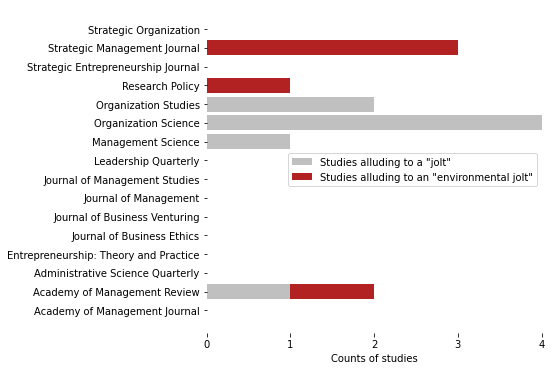

In [4]:
# "jolt" occurrences
# data prep
# --+ order data
df.sort_values(["Source title", "Year"], inplace=True)
# encode journal names
le = preprocessing.LabelEncoder()
le.fit(df["Source title"].unique())
# --+ counts of studies by type of shock
# ----+ jolt
gr = df.loc[(df["jolt"] == 1) & (df["environmental jolt"] == False)].groupby(
    ["Source title"], as_index=False
)
jolt = pd.DataFrame(gr.size())
# ----+ environmental jolt
gr = df.loc[(df["jolt"] == 1) & (df["environmental jolt"] == True)].groupby(
    ["Source title"], as_index=False
)
env_jolt = pd.DataFrame(gr.size())
# ----+ data to pass to the chart
data = pd.DataFrame({"Source title": le.classes_},)
data = pd.merge(data, jolt, on="Source title", how="left")
data = pd.merge(data, env_jolt, on="Source title", how="left")
data.fillna(0, inplace=True)
# create stacked bar chart
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(
    data.index, data["size_x"], label='Studies alluding to a "jolt"', color="silver"
)
ax.barh(
    data.index,
    width=data["size_y"],
    left=data["size_x"],
    label='Studies alluding to an "environmental jolt"',
    color="firebrick",
)
# labels and ticks
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel("Counts of studies")
ax.set_ylabel("")
ax.set_yticks(data.index)
ax.set_yticklabels(le.classes_)
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# legend
ax.legend(loc="best")
# plot
plt.show()

### Abstracts including 'shock'

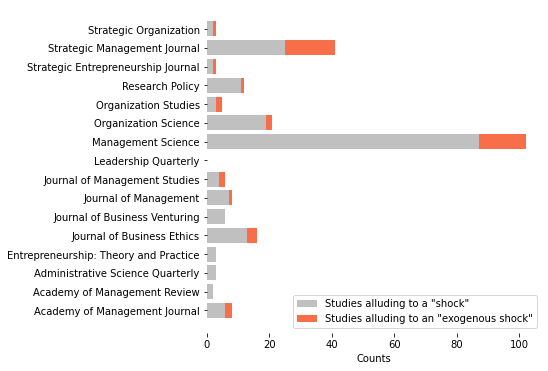

In [5]:
# data prep
# --+ order data
df.sort_values(["Source title", "Year"], inplace=True)
# encode journal names
le = preprocessing.LabelEncoder()
le.fit(df["Source title"].unique())
# --+ counts of studies by type of shock
# ----+ non exogenous shock
gr = df.loc[(df["shock"] == 1) & (df["exogenous shock"] == False)].groupby(
    ["Source title"], as_index=False
)
shock = pd.DataFrame(gr.size())
# ----+ exogenous shock
gr = df.loc[(df["shock"] == 1) & (df["exogenous shock"] == True)].groupby(
    ["Source title"], as_index=False
)
ex_shock = pd.DataFrame(gr.size())
# ----+ data to pass to the chart
data = pd.DataFrame({"Source title": le.classes_},)
data = pd.merge(data, shock, on="Source title", how="left")
data = pd.merge(data, ex_shock, on="Source title", how="left")
data.fillna(0, inplace=True)
# create stacked bar chart
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(
    data.index, data["size_x"], label='Studies alluding to a "shock"', color="silver"
)
ax.barh(
    data.index,
    width=data["size_y"],
    left=data["size_x"],
    label='Studies alluding to an "exogenous shock"',
    color="#f76e49",
)
# labels and ticks
ax.set_xlabel("Counts")
ax.set_ylabel("")
ax.set_yticks(data.index)
ax.set_yticklabels(le.classes_)
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# legend
ax.legend(loc="best")
# plot
plt.show()


### Inter-temporal distribution of abstracts regarding candidate studies

#### 'Jolt' or 'exogenous shock'

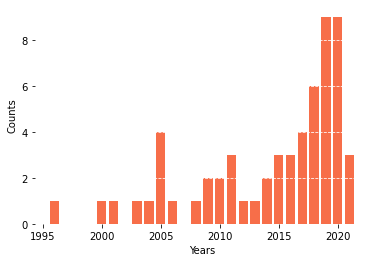

In [6]:
# data prep
df.loc[:, "exogenous shock or jolt"] = df["exogenous shock"] + df["jolt"]
gr = df.loc[df["Year"] > 1995].groupby("Year")
data = gr["exogenous shock or jolt"].agg(np.sum)
# bar chart
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
plt.bar(x=data.keys(), height=data.values, color="#f76e49")
#plt.plot(data.keys(), data.values, color="firebrick", marker="o", markeredgecolor="white")
# labels and ticks
ax.set_xlabel("Years")
ax.set_ylabel("Counts")
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# grid
ax.grid(axis="y", color="white", linestyle="--")
# show plot
plt.show()


#### 'Jolt' or 'shock'

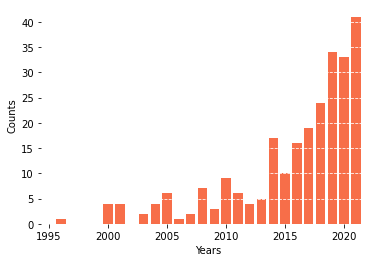

In [7]:
# data prep
df.loc[:, "shock or jolt"] = df["shock"] + df["jolt"]
gr = df.loc[df["Year"] > 1995].groupby("Year")
data = gr["shock or jolt"].agg(np.sum)
# bar chart
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
plt.bar(x=data.keys(), height=data.values, color="#f76e49")
#plt.plot(data.keys(), data.values, color="firebrick", marker="o", markeredgecolor="white")
# labels and ticks
ax.set_xlabel("Years")
ax.set_ylabel("Counts")
# hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
# grid
ax.grid(axis="y", color="white", linestyle="--")
# show plot
plt.show()

### List of studies whose abstract mentions 'jolt' or 'exogenous shock'

In [8]:
exsh = df.loc[(df["jolt"]==1) | (df["exogenous shock"]==1), ["Authors", "Year", "Source title"]]

In [9]:
exsh

,Authors,Year,Source title
15160,Vergne J.-P.,2012,Academy of Management Journal
14500,"Gupta V.K., Mortal S., Chakrabarty B., Guo X.,...",2020,Academy of Management Journal
12956,"Pouder R., St. John C.H.",1996,Academy of Management Review
12096,Wellman N.,2017,Academy of Management Review
23159,"Cai J., Shi G.",2019,Journal of Business Ethics
22347,"Seebeck A., Vetter J.",2021,Journal of Business Ethics
27197,"Hilary G., Huang S.",2021,Journal of Business Ethics
459,"Micelotta E., Lounsbury M., Greenwood R.",2017,Journal of Management
18035,"Glynn M.A., Lounsbury M.",2005,Journal of Management Studies
17705,Jenkins M.,2010,Journal of Management Studies
